<a href="https://colab.research.google.com/github/IrizGem/Steganography/blob/main/Stega_Koch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

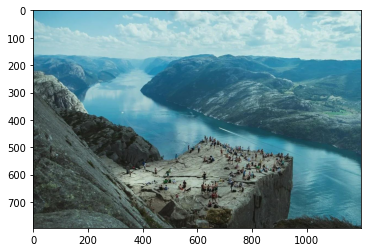

"Do not you feel a great inclination, Miss Bennet, to seize such an opportunity of dancing a reel?"
99 символов -> 792 бит
размер изображения -> ( 1199 x 795 )


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image
import math
from scipy.fft import dct, idct
from sklearn.feature_extraction import image

fread = '/content/drive/MyDrive/NN/VOC2012/TestImages/pic.bmp'
fwrite = '/content/drive/MyDrive/NN/VOC2012/TestImages/stegopic.bmp'


block_size = 8
eps = 250

u1 = 3
v1 = 4
u2 = 4
v2 = 3

#чтение файла
img = Image.open(fread)
plt.imshow(img)
plt.show()

#задание последовательности
mess = '"Do not you feel a great inclination, Miss Bennet, to seize such an opportunity of dancing a reel?"'
#mess = 'dancing a reel'
bits=''
for ch in mess:
  bits+=format(ord(ch), "08b")
print(mess)


l = len(bits)
w = img.width
h = img.height

print(len(mess), "символов ->", len(bits), "бит")
print("размер изображения -> (" , w, "x", h, ")")



Итоговое изображение


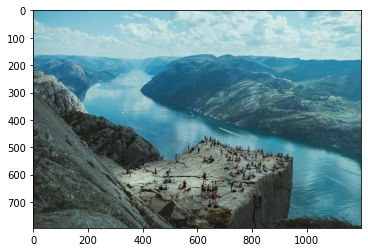

In [ ]:
(r, g, b) = img.split()
acb = np.asarray(b, dtype='int64')
patches = image.extract_patches_2d(acb, (block_size, block_size))

for patch in patches: 
    dct(patch, overwrite_x = True)

i = 0
while (i < len(bits)):
    patch = patches[i]
    K1 = patch[u1][v1]
    K2 = patch[u2][v2]
    K = abs(K1) - abs(K2)
    cur_bit = bits[i]
    if cur_bit == '1' and (K >= -eps):
        i = i+1
        while K >= -eps:
            K1 = K1 - 1
            K2 = K2 + 1
            K = abs(K1) - abs(K2)
        patch[u1][v1] = K1
        patch[u2][v2] = K2
    elif cur_bit == '0' and K <= eps: 
        i = i + 1
        while (K <= eps):
            K1 = K1 + 1
            K2 = K2 - 1
            K = abs(K1) - abs(K2)
        patch[u1][v1] = K1
        patch[u2][v2] = K2
    else:
        i = i + 1

for patch in patches:
    idct(patch, overwrite_x = True)

acb2 = image.reconstruct_from_patches_2d(patches, (h, w))
acb2 = acb2.astype(np.uint8)
b_n = Image.fromarray(acb2, 'L')
changed_image = Image.merge('RGB', (r,g,b_n))
changed_image.save(fwrite)

print('Итоговое изображение')
plt.imshow(changed_image)
plt.show()


In [ ]:
img = Image.open(fwrite)
(r, g, b) = img.split()

u1 = 3
v1 = 4
u2 = 4
v2 = 3

i = 0
bits_a = ''

acb = np.asarray(b, dtype='int64')

patches = image.extract_patches_2d(acb, (block_size, block_size))

for patch in patches:
    dct(patch,overwrite_x = True)

while (i < l):
    patch = patches[i]
    K1 = abs(patch[u1][v1])
    K2 = abs(patch[u2][v2])
    if (K1 > K2):
        bits_a+='0'
        i = i + 1
    else:
        bits_a+='1'
        i = i + 1

syms_a = [ bits_a[bit:bit+block_size] for bit in range(0, len(bits_a), block_size) ]
syms = [ bits[bit:bit+block_size] for bit in range(0, len(bits), block_size) ]


print("<<<RESULTS>>>")
print()
print(syms)
print()
print(syms_a)
print()

mess_a = ""
mess = ""
for i in range(len(syms_a)):
  mess_a +=chr(int(syms_a[i], 2))
  mess +=chr(int(syms[i], 2))

print("Начальное сообщение: ", mess)
print(" Итоговое сообщение: ", mess_a)

<<<RESULTS>>>

['00100010', '01000100', '01101111', '00100000', '01101110', '01101111', '01110100', '00100000', '01111001', '01101111', '01110101', '00100000', '01100110', '01100101', '01100101', '01101100', '00100000', '01100001', '00100000', '01100111', '01110010', '01100101', '01100001', '01110100', '00100000', '01101001', '01101110', '01100011', '01101100', '01101001', '01101110', '01100001', '01110100', '01101001', '01101111', '01101110', '00101100', '00100000', '01001101', '01101001', '01110011', '01110011', '00100000', '01000010', '01100101', '01101110', '01101110', '01100101', '01110100', '00101100', '00100000', '01110100', '01101111', '00100000', '01110011', '01100101', '01101001', '01111010', '01100101', '00100000', '01110011', '01110101', '01100011', '01101000', '00100000', '01100001', '01101110', '00100000', '01101111', '01110000', '01110000', '01101111', '01110010', '01110100', '01110101', '01101110', '01101001', '01110100', '01111001', '00100000', '01101111', '01100110', 

Изображения


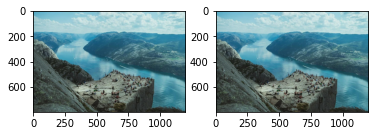

Метрики
MAX D ->  253
NMSE ->  3.4952517317266104e-07
UQI ->  0.9999981367482124


In [ ]:
# Метрики для изображений

img = Image.open(fwrite)
img = np.array(img)
img_empty = Image.open(fread)
img_empty = np.array(img_empty)
#img =  mpimg.imread(fwrite)
#img_empty = mpimg.imread(fread)

print("Изображения")

plt.subplot(1,2,2)
plt.imshow(img_empty)

plt.subplot(1,2,1)
plt.imshow(img)
plt.show()

w = img.shape[1]
h = img.shape[0]

print("Метрики")

MAX_D = np.max(img-img_empty)
print("MAX D -> ", MAX_D)

NMSE = (np.sum(img_empty-img) ** 2)/(np.sum(img_empty) ** 2)
print("NMSE -> ", NMSE)

mn_i = np.mean(img)
mn_ie = np.mean(img_empty)

sig_i = np.sum((img-mn_i)*(img-mn_i))/(w*h*3) #np.var(img)
sig_ie = np.sum((img_empty-mn_ie)*(img_empty-mn_ie))/(w*h*3) #np.var(img_empty)
sig_iie = np.sum((img_empty-mn_ie)*(img-mn_i))/(w*h*3) #np.sum((img_empty-mn_ie)*(img-mn_i))*1/(w*h*3)
UQI = (4*sig_iie*mn_i*mn_ie)/((sig_ie**2+sig_i**2)*(mn_ie**2+mn_i**2))

print("UQI -> ", sig_iie/(sig_i**(1/2)*sig_ie**(1/2))*2*mn_ie*mn_i/(mn_ie**2+mn_i**2)*2*sig_iie/(sig_ie+sig_i))

